<a href="https://colab.research.google.com/github/kaimakov-rk/kokoko/blob/master/Copy_of_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [2]:
!pip install pandas
!pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [18]:
df = pd.read_csv("/content/predictive_maintenance.csv")
df.columns.tolist() # четать файл

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [61]:
cat_name = "Failure Type"
df[cat_name] = df[cat_name].astype("category")

In [87]:
name = "Process temperature [K]"
describe =  df[name].describe(include='all')
describe # ваш код здесь


count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

In [88]:
tdescribe =  df["Target"].describe(include='all')
mean = tdescribe.loc[["mean"]] # (среднее) ваш код здесь
mean

mean    0.0339
Name: Target, dtype: float64

In [89]:
median = tdescribe.loc[["50%"]]# (медиана) ваш код здесь
median

50%    0.0
Name: Target, dtype: float64

In [90]:
mode = df["Target"].mode() # (мода) ваш код здесь
mode

0    0
Name: Target, dtype: int64

In [92]:
min = tdescribe.loc[["min"]] # (минимум) ваш код здесь
min

min    0.0
Name: Target, dtype: float64

In [93]:
max = tdescribe.loc[["max"]] # (максимум) ваш код здесь
max

max    1.0
Name: Target, dtype: float64

In [94]:
std = tdescribe.loc[["std"]] # (стандартное отклонение) Ваш код здесь
std

std    0.180981
Name: Target, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [95]:
q1 = describe.loc[["25%"]] # (25% квантиль) ваш код здесь
q1

25%    308.8
Name: Process temperature [K], dtype: float64

In [96]:
q2 = float(describe.loc["50%"]) # (50% квантиль) ваш код здесь
q2

310.1

In [97]:
q3 = float(describe.loc["75%"]) # (75% квантиль) ваш код здесь
q3

311.1

In [98]:
iqr = float(q3 - q1) # (интерквартильный размах) ваш код здесь
iqr

2.3000000000000114

Какие выводы можно сделать исходя из полученных статистических данных?


**Ответ здесь**

```
Цыфры это хорошо, из них сделана математика
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

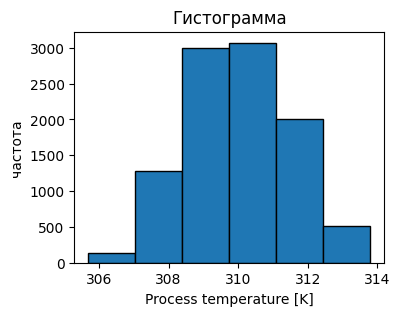

In [105]:
# Пример гистограммы для возраста
plt.figure(figsize=(4, 3))
plt.hist(df[name], bins=6, edgecolor='black')
plt.title('Гистограмма')
plt.xlabel(name)
plt.ylabel("частота")
plt.show()

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

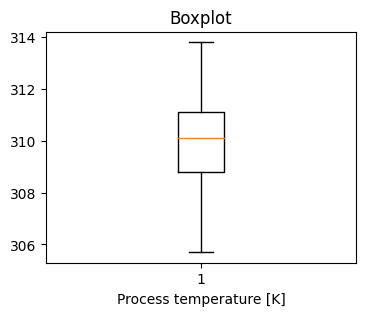

In [107]:
plt.figure(figsize=(4, 3))
plt.boxplot(df[name])
plt.title('Boxplot')
plt.xlabel(name)
plt.show()

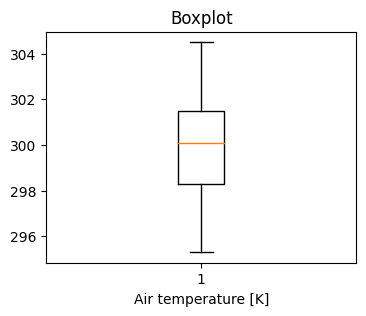

In [109]:
plt.figure(figsize=(4, 3))
plt.boxplot(df["Air temperature [K]"])
plt.title('Boxplot')
plt.xlabel("Air temperature [K]")
plt.show()

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

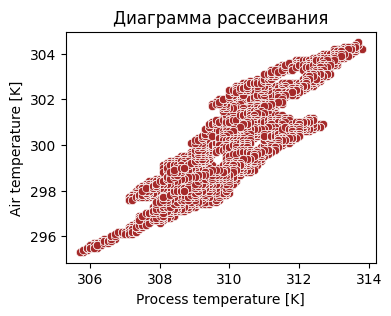

In [112]:
data_df = df[[name, "Air temperature [K]"]]
plt.figure(figsize=(4, 3))
sns.scatterplot(y='Air temperature [K]',
                x=name, data=data_df, color='brown')
plt.title('Диаграмма рассеивания')
plt.xlabel(name)
plt.ylabel('Air temperature [K]')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

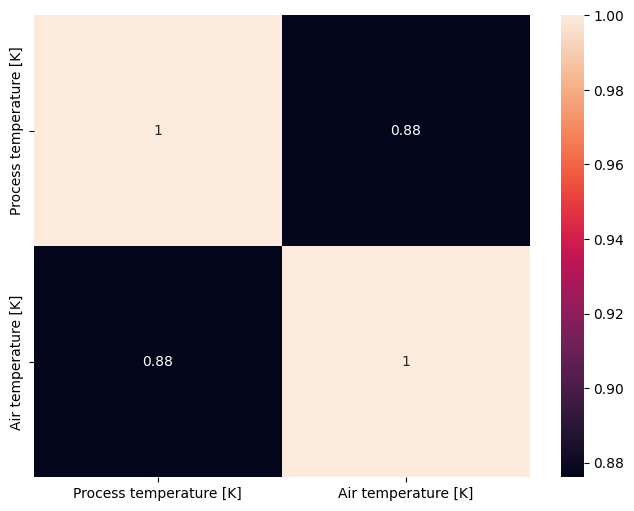

In [113]:
corr_matrix = data_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**
По всей видимости, чем больше температура воздуха, тем больше тепература процесса.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]